<center>
<img src="https://www.techrepublic.com/a/hub/i/r/2021/06/03/1130ef3e-48cf-4d60-8b86-ca6a6d9bf51f/resize/1200x/526f97f4e170b0a301a7e2a494c727b0/python-code-developer-programming.jpg" width="700" height="200" />>
    
##  Workshop Python 2021-I ( 19 Agosto )

Autor: [Josimar Chire](https://github.com/jecs89).\
Institución: Research4Tech\
Correo: jecs89@gmail.com
    
Este material está sujeto a los términos y condiciones de la licencia [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso gratuito para cualquier propósito no comercial.
    

# <center> Processamento de Imagens


In [ ]:
!wget https://www.infoescola.com/wp-content/uploads/2008/06/esfinge-de-gize-156925709.jpg
!mv esfinge-de-gize-156925709.jpg esfinge.jpg

--2021-08-19 19:05:33--  https://www.infoescola.com/wp-content/uploads/2008/06/esfinge-de-gize-156925709.jpg
Resolving www.infoescola.com (www.infoescola.com)... 172.67.69.174, 104.26.14.180, 104.26.15.180, ...
Connecting to www.infoescola.com (www.infoescola.com)|172.67.69.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1110957 (1.1M) [image/jpeg]
Saving to: ‘esfinge-de-gize-156925709.jpg’

esfinge-de-gize-156 100%[===================>]   1.06M  --.-KB/s    in 0.03s   

2021-08-19 19:05:33 (36.1 MB/s) - ‘esfinge-de-gize-156925709.jpg’ saved [1110957/1110957]



In [ ]:
import matplotlib.pyplot as plt
import cv2 as cv
import imageio as io
import numpy as np

In [ ]:
im = cv.imread('esfinge.jpg')
im1 = io.imread('esfinge.jpg')

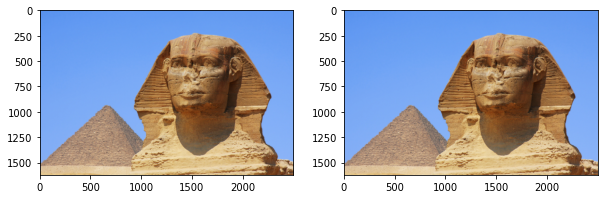

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(im1)
plt.show()

In [ ]:
cinzas = np.arange(0,256).reshape((16,16))
print(cinzas.shape)

(16, 16)


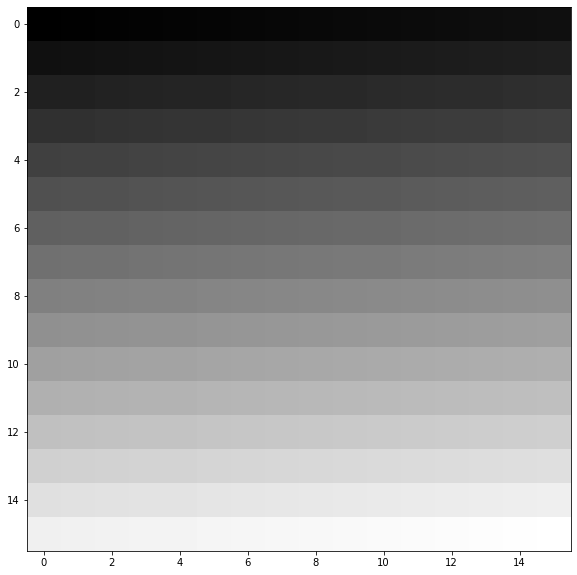

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.imshow(cinzas, cmap='gray', vmin=0, vmax=255)

In [ ]:
def my_hist(img):
  hist = np.zeros([256])

  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      hist[ int(img[i,j]) ] += 1
  return hist

In [ ]:
im_r = np.copy(im1)
im_r[:,:,1] = im_r[:,:,2] = 0
im_g = np.copy(im1)
im_g[:,:,0] = im_g[:,:,2] = 0
im_b = np.copy(im1)
im_b[:,:,0] = im_b[:,:,1] = 0

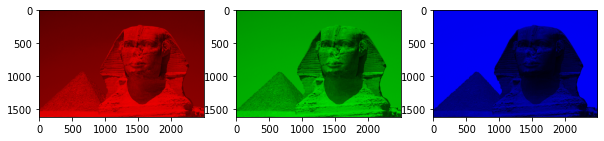

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(im_r)
plt.subplot(1,3,2)
plt.imshow(im_g)
plt.subplot(1,3,3)
plt.imshow(im_b)
plt.show()

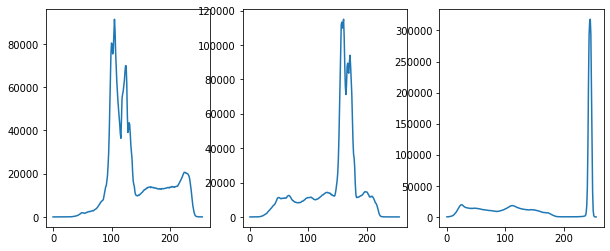

In [ ]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,3,1)
plt.plot(my_hist(im1[:,:,0]))
plt.subplot(1,3,2)
plt.plot(my_hist(im1[:,:,1]))
plt.subplot(1,3,3)
plt.plot(my_hist(im1[:,:,2]))
plt.show()

In [ ]:
#https://www.tutorialspoint.com/dip/grayscale_to_rgb_conversion.htm
img_gray = np.zeros([im1.shape[0], im1.shape[1]])
for i in range(0, img_gray.shape[0]):
  for j in range(0, img_gray.shape[1]):
    img_gray[i,j] = (0.3 * im1[i,j,0]) + (0.59 * im1[i,j,1]) + (0.11 * im1[i,j,2])

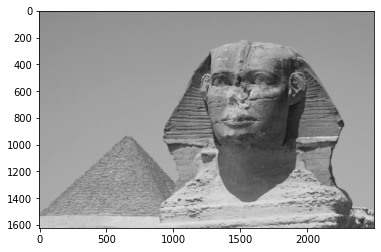

In [ ]:
plt.imshow(img_gray, cmap='gray', vmin=0, vmax=255 )

In [ ]:
copy = np.copy(im1[:,:,2])

In [ ]:
for i in range(0, img_gray.shape[0]):
  for j in range(0, img_gray.shape[1]):
    if copy[i,j] > 235:
      copy[i,j] = 0

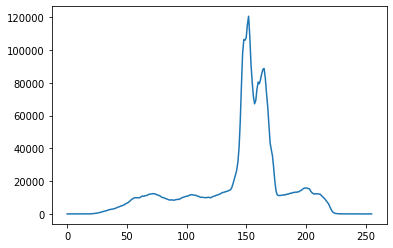

In [ ]:
plt.plot(my_hist(img_gray))

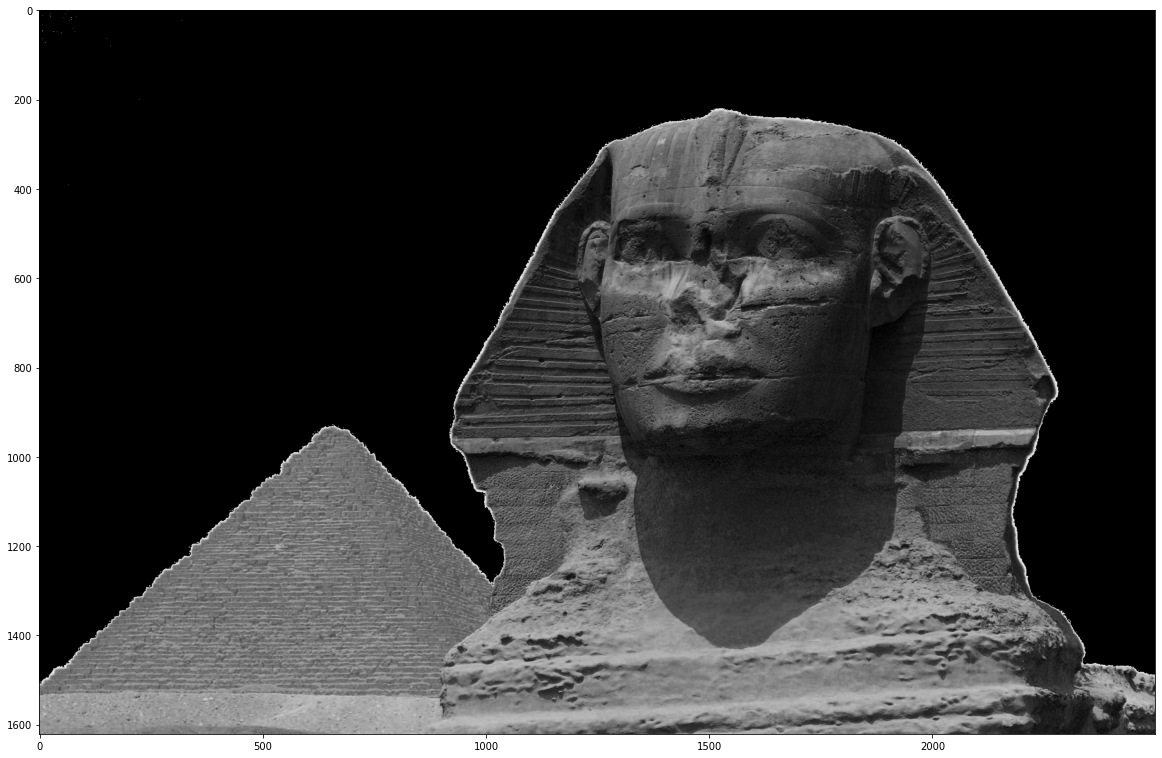

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.imshow(copy, cmap='gray', vmin=0, vmax=255 )

In [ ]:
#https://setosa.io/ev/image-kernels/

In [ ]:
kernel = np.array([[-1,-1,-1],
          [-1,9,-1],
          [-1,-1,-1]])
dst = cv.filter2D(copy,-1,kernel)
# dst = cv.filter2D(dst,-1,kernel)
# dst = cv.filter2D(dst,-1,kernel)
# dst = cv.filter2D(dst,-1,kernel)
# dst = cv.filter2D(dst,-1,kernel)

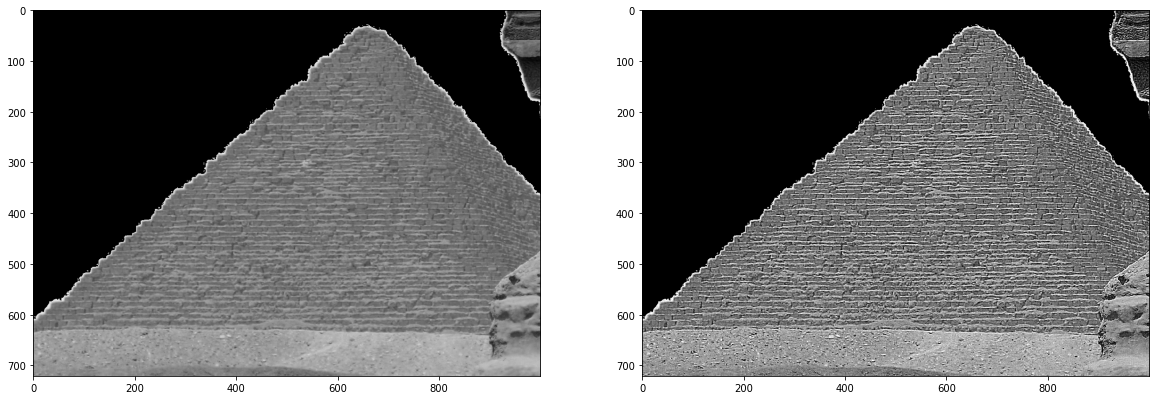

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(copy[900:,0:1000], cmap='gray', vmin=0, vmax=255 )
plt.subplot(1,2,2)
plt.imshow(dst[900:,0:1000], cmap='gray', vmin=0, vmax=255 )
plt.show()

In [ ]:
contours, hierarchy = cv.findContours(copy, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

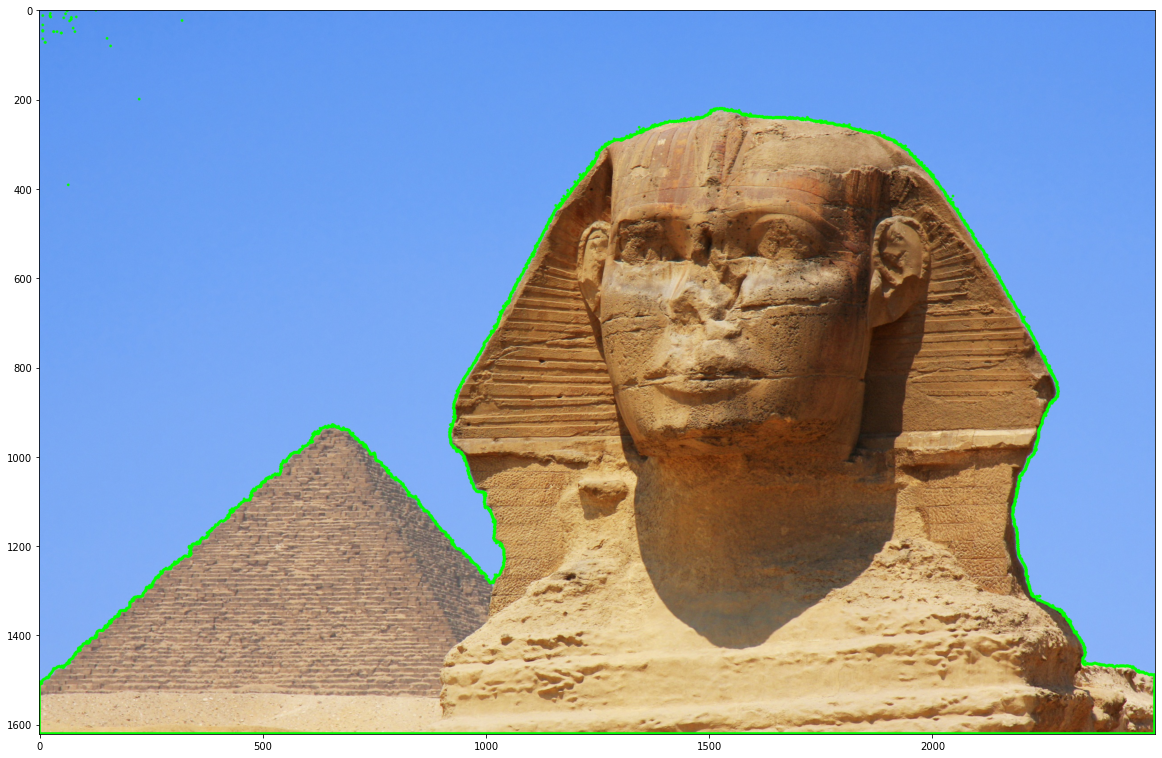

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.imshow(cv.drawContours(im1, contours, -1, (0, 255, 0), 5))